## learning-AI101 : topic1_8

linear regression (선형회귀)를 이용해서 키를 통한 신발 사이즈 추론

In [1]:
import tensorflow as tf

dt_height = [170, 180, 175, 160] # 샘플데이터 키
dt_shoes_size = [260, 270, 265, 255] # 샘플데이터 키에 맞는 신발사이즈
# 170cm가 260 신고, 180cm가 270 신고...
# y = ax + b에서 y가 신발, x가 키

2024-01-11 15:35:38.591176: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


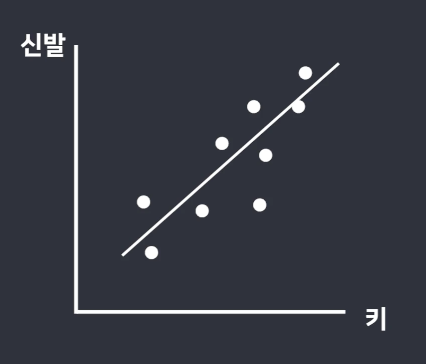

이런 형식으로 직선 그릴 수 있다 (선형회귀)

In [8]:
dt_height = 170
dt_shoes_size = 260
# 신발 = 키 * a + b / a랑 b를 딥러닝으로 구해야 한다 (a랑 b도 weight의 한 종류)

a = tf.Variable(0.1) # 초기값은 랜덤 (아무거나) -> 경사하강법 이용할 거니깐
b = tf.Variable(0.2)

def loss_function() : # 손실함수는 자신이 직접 만들어야함
    # return (실제값 - 예측값) ** 2
    guess = (dt_height * a + b)
    return (dt_shoes_size - guess) ** 2

# 경사하강법을 이용해서 a와 b를 업데이트해줌 (argument로 learning rate 작성 가능)
opt = tf.keras.optimizers.Adam(learning_rate = 0.1) 

for i in range (100) : # 경사하강법 반복
    # 경사하강법 실행 : opt.minimize (손실함수, var_list=[경사하강법으로 업데이트할 weight variable 목록])
    opt.minimize(loss_function, var_list = [a, b]) # a랑 b를 업데이트할 거니깐 var_list에 a, b 집어넣음
    print (a.numpy(), b.numpy())

0.19999935 0.29999933
0.29974166 0.39974165
0.39902657 0.49902657
0.49762622 0.5976262
0.59528726 0.6952872
0.69172704 0.791727
0.7866315 0.8866315
0.8796569 0.9796569
0.97042876 1.0704287
1.0585449 1.1585448
1.1435785 1.2435784
1.225085 1.3250849
1.3026105 1.4026104
1.3757026 1.4757026
1.4439243 1.5439243
1.5068681 1.6068681
1.5641723 1.6641723
1.6155354 1.7155354
1.6607298 1.7607299
1.6996118 1.799612
1.7321278 1.832128
1.7583159 1.8583162
1.778304 1.8783042
1.7923038 1.8923041
1.8006022 1.9006025
1.8035508 1.9035511
1.8015554 1.9015557
1.7950639 1.8950641
1.7845563 1.8845565
1.770535 1.8705353
1.7535154 1.8535156
1.7340184 1.8340187
1.7125634 1.8125637
1.6896611 1.7896614
1.6658087 1.7658088
1.6414832 1.7414833
1.617137 1.7171371
1.5931927 1.6931928
1.5700383 1.6700385
1.5480232 1.6480234
1.5274543 1.6274544
1.5085928 1.608593
1.4916525 1.5916526
1.4767977 1.5767978
1.464143 1.5641432
1.4537541 1.5537542
1.4456487 1.5456488
1.4397995 1.5397997
1.4361376 1.5361377
1.4345558 1.5345559

그래서 결과적으로는 a값은 1.516\~, b값은 1.616\~ 정도가 가장 정확하다고 알려주고 있음.  
그러면 실제 데이터로 검산을 하면 경사하강법이 제대로 작동하였는지 확인 가능

In [11]:
print (1.516 * 170 + 1.616) # 260 언저리가 나온 것을 확인할 수 있다.

259.336
